## PCA Exercise - Dimensionality reduction

We will test some of the dimensionality reduction techniques on sklearn's [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

_____________________
#### Part 1: Interpreting PCs

1. Load up the wine dataset and run a PCA over it. 
    - **Note:** Don't forget to scale your data and check for any missing values before running your PCA.


2. Extract the two best principal components (n_components=2). 

3. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?

4. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 

5. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.


In [4]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import plotly.express as px

In [54]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [7]:
data, target = load_wine(return_X_y=True,as_frame=True)
data.shape

(178, 13)

In [8]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [10]:
scaler = StandardScaler() 
data_scaled = pd.DataFrame(scaler.fit_transform(data))
data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [11]:
data_scaled.columns = data.columns+['_scaled']
data_scaled.head(1)

,alcohol_scaled,malic_acid_scaled,ash_scaled,alcalinity_of_ash_scaled,magnesium_scaled,total_phenols_scaled,flavanoids_scaled,nonflavanoid_phenols_scaled,proanthocyanins_scaled,color_intensity_scaled,hue_scaled,od280/od315_of_diluted_wines_scaled,proline_scaled
0,1.518613,-0.56225,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.84792,1.013009


<AxesSubplot: >

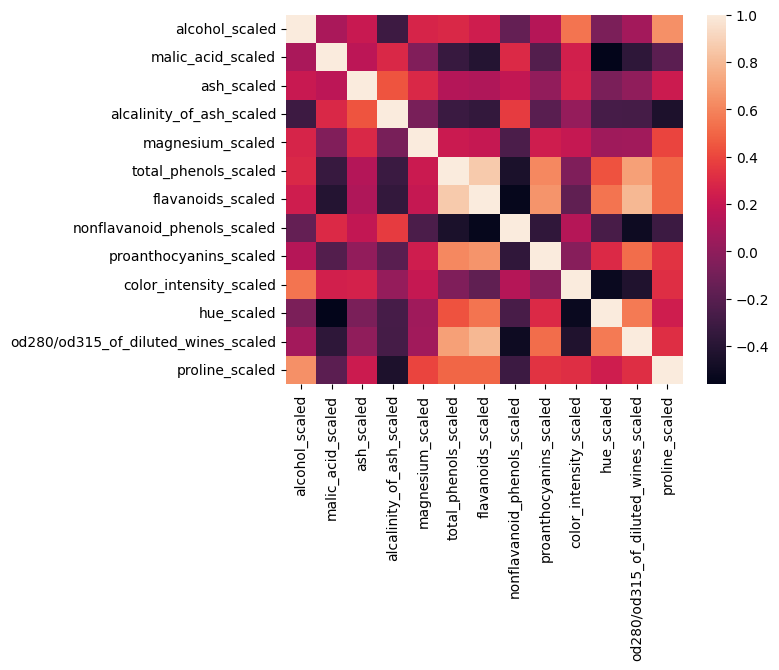

In [33]:
# Make a heatmap to see the 2 best principal compoenents
sns.heatmap(data_scaled.corr())

In [13]:
# Aside from flavonoids and total phenols, next strongest correlation is hard to pick out from the heatmap.
cov = np.cov(data_scaled)
cov

array([[ 0.94194263,  0.70581209,  0.36507951, ..., -0.32366933,
        -0.25191907, -0.77261093],
       [ 0.70581209,  0.94151839,  0.29116368, ..., -0.44362127,
        -0.45417883, -0.87574038],
       [ 0.36507951,  0.29116368,  0.5512209 , ..., -0.4042183 ,
        -0.34622848, -0.50608494],
       ...,
       [-0.32366933, -0.44362127, -0.4042183 , ...,  1.56168742,
         1.25946005,  1.17306376],
       [-0.25191907, -0.45417883, -0.34622848, ...,  1.25946005,
         1.23413659,  1.03659322],
       [-0.77261093, -0.87574038, -0.50608494, ...,  1.17306376,
         1.03659322,  1.68537124]])

In [67]:
# Apply PCA
pca = PCA(n_components=2)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
data_pca = pd.DataFrame(data_pca)
data_pca

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


<AxesSubplot: xlabel='0', ylabel='1'>

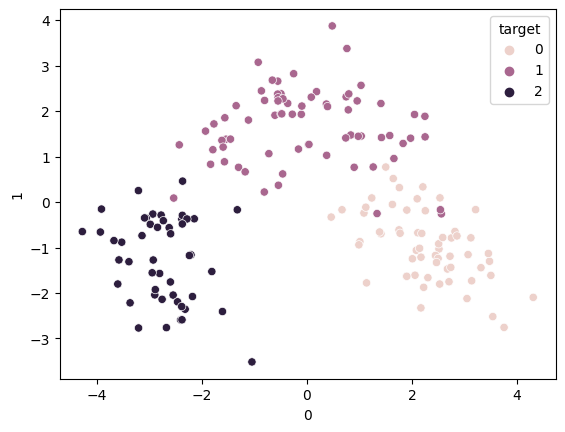

In [15]:
# The data set returns a `target` that includes the classes for each sample.
sns.scatterplot(x=data_pca[0],y=data_pca[1],hue=target)

In [23]:
# Visualize the main principal components with plotly
fig = px.scatter_matrix(
    data_pca,
    color=target,
    dimensions=range(2))
fig.update_traces(diagonal_visible=False)
fig.show()

c:\ProgramData\Anaconda3\envs\geopandasEnv\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [71]:
print(pca.components_.shape)
loadings = pd.DataFrame(pca.components_)
loadings.columns = data.columns
loadings

(2, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903


In [69]:
np.transpose(pca.components_)

array([[ 0.1443294 , -0.48365155],
       [-0.24518758, -0.22493093],
       [-0.00205106, -0.31606881],
       [-0.23932041,  0.0105905 ],
       [ 0.14199204, -0.299634  ],
       [ 0.39466085, -0.06503951],
       [ 0.4229343 ,  0.00335981],
       [-0.2985331 , -0.02877949],
       [ 0.31342949, -0.03930172],
       [-0.0886167 , -0.52999567],
       [ 0.29671456,  0.27923515],
       [ 0.37616741,  0.16449619],
       [ 0.28675223, -0.36490283]])

In [75]:
pca.explained_variance_

array([4.73243698, 2.51108093])

Text(0, 0.5, 'PC2')

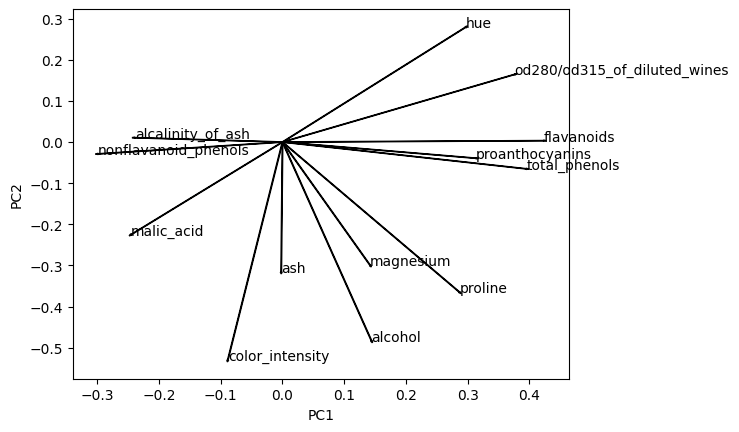

In [82]:
# loading plot
for feature, vector in loadings.items():
    # Plot each feature using the two principal components as axes
    plt.arrow(0,0,vector[0],vector[1]) 
    # Label each arrow at the tip of the line
    plt.text(vector[0],vector[1],feature)
plt.xlabel('PC1')
plt.ylabel('PC2')


Text(0, 0.5, 'PC2')

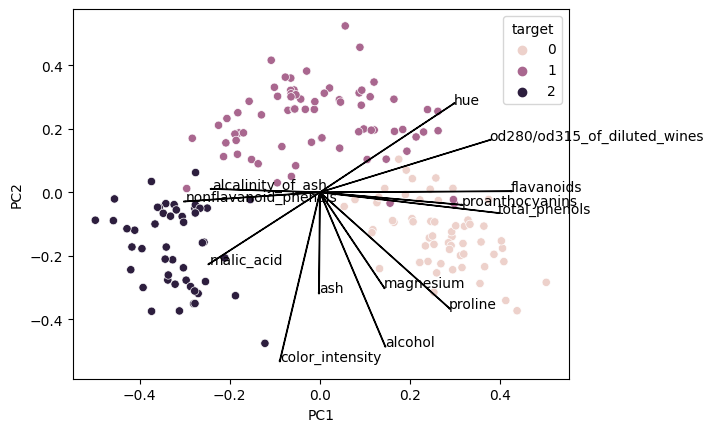

In [85]:
# Scale the raw data down so it can be plotted with the loading plot from above
xscale = 1/(data_pca[0].max()-data_pca[0].min())
yscale = 1/(data_pca[1].max()-data_pca[1].min())

# Make the plots
sns.scatterplot(x=data_pca[0]*xscale,y=data_pca[1]*yscale,hue=target)

for feature, vector in loadings.items():
    # Plot each feature using the two principal components as axes
    plt.arrow(0,0,vector[0],vector[1]) 
    # Label each arrow at the tip of the line
    plt.text(vector[0],vector[1],feature)
plt.xlabel('PC1')
plt.ylabel('PC2')

_____________________
#### Part 2: PCA in practice
    
1. Plot a scree plot to determine the number of principal components you want to keep. Use the elbow rule.

2. Create a cumulative explained_variance_ratio plot. Determine the number of principal components you want to keep. Use the elbow rule. 

3. Refit your PCA with the chosen optimal number of principal components and project the principal components to a DataFrame. Also, you should name the columns of the DataFrame appropriately. 

4. Export the data with the new features to a CSV file. The number of rows should be the same as in the original dataset.

In [43]:
pca2 = PCA(n_components=13)
pca2.fit(data_scaled)
data_pca2 = pca2.transform(data_scaled)
data_pca2 = pd.DataFrame(data_pca2)
data_pca2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


Text(0.5, 1.0, 'Scree Plot')

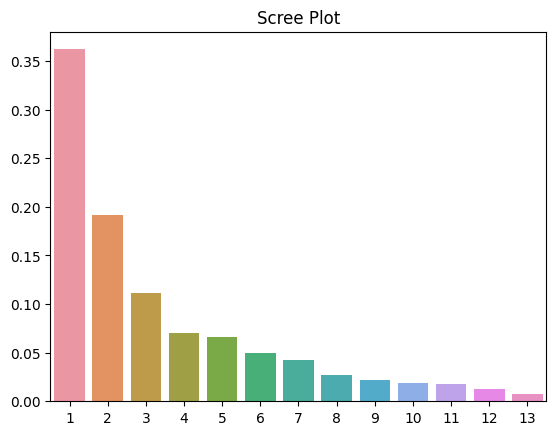

In [55]:
PC_values = np.arange(13) + 1
fig, ax = plt.subplots()
sns.barplot(x=PC_values, y=pca2.explained_variance_ratio_)
ax.set_title('Scree Plot')

<AxesSubplot: >

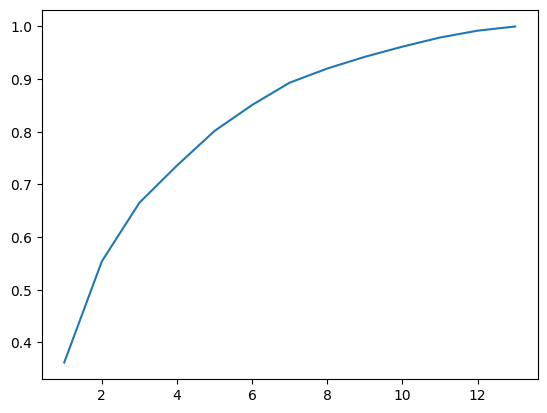

In [57]:
# Cumulative explained ratio plot
sns.lineplot(x=PC_values, y=np.cumsum(pca2.explained_variance_ratio_))

In [58]:
# Refit with 4 components
pca3 = PCA(n_components=4)
pca3.fit(data_scaled)
data3 = pca3.transform(data_scaled)
data3 = pd.DataFrame(data3)
data3.head(3)

,0,1,2,3
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902


In [66]:
# Rename columns (erased code that added 1 to the original column names)
data3.columns=['pc']+data3.columns.astype(str)
data3.head(1)

,pc1,pc2,pc3,pc4
0,3.316751,-1.443463,-0.165739,-0.215631


In [87]:
data3.to_csv('winePCA_4dim.csv')

_________________________
#### Part 3: Stretch Activities (Optional)

1. Plot a variable correlation plot. 

    - **Hint:** We can create a scatter plot with 1st component on the x-axis and the second component on y-axis. 
    - **Hint:** The length of each component is equal to the number of columns (features) we have in our data before PCA. Points in the graph that are close to each other are similar features. We need to annotate the points with feature names.